#**Overview:**

In this notebook the models that have been trained and finetuned in previous notebooks are compared. This comparison is used to determine how the hyperparameters should be set, and which pretrained models perform the best.
The final comparison is also included between the mono modal models and the multimodal approach.

#Importing neccessary libraries

In [3]:
import pickle
from google.colab import drive
from sklearn.metrics import f1_score, classification_report
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**BERT experiment results**

##**Pretrained model Comparison**

In [ ]:
model_name_list = ['emilyalsentzer/Bio_ClinicalBERT','bert-base-uncased','dmis-lab/biobert-base-cased-v1.1','bionlp/bluebert_pubmed_mimic_uncased_L-12_H-768_A-12']
model_names = model_name_list
filenames = []
for i in range(len(model_names)):
  filenames.append(model_names[i].split('/')[-1])
train_accuracies = []
all_preds_train = []
all_labels_train = []
val_accuracies = []
all_preds_val = []
all_labels_val = []
for name in filenames:
  with open(f'/content/drive/My Drive/Dissertation/reports/Models/scores/{name}_batch16.pkl', 'rb') as f:
      data = pickle.load(f)
  train_accuracies.append(data['train_accuracies'])
  all_preds_train.append(data['train_preds'])
  all_labels_train.append(data['train_labels'])
  val_accuracies.append(data['val_accuracies'])
  all_preds_val.append(data['val_preds'])
  all_labels_val.append(data['val_labels'])

In [ ]:
filenames

['Bio_ClinicalBERT',
 'bert-base-uncased',
 'biobert-base-cased-v1.1',
 'bluebert_pubmed_mimic_uncased_L-12_H-768_A-12']

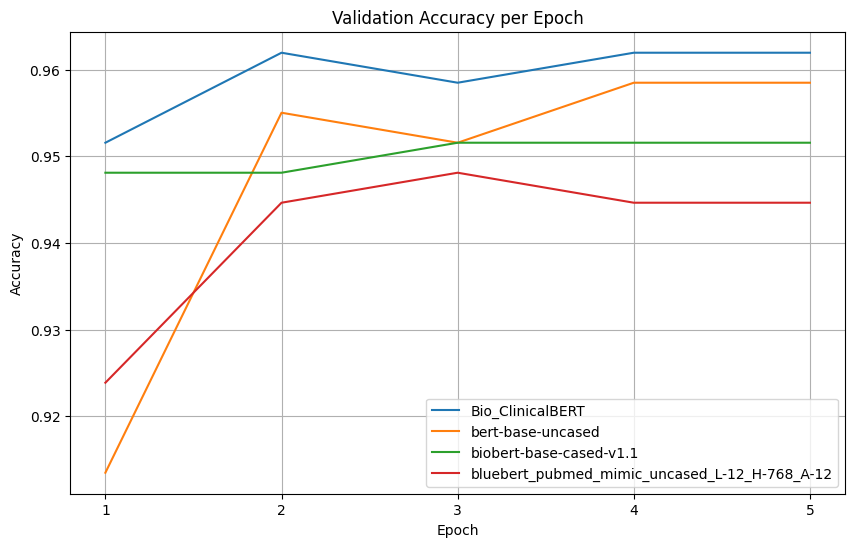

In [ ]:
import matplotlib.pyplot as plt

# Assuming val_accuracies is a list of lists, where each inner list contains the validation accuracies per epoch for a model
plt.figure(figsize=(10, 6))
for i in range(len(filenames)):
  plt.plot(val_accuracies[i], label=filenames[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(len(val_accuracies[0])), range(1, len(val_accuracies[0]) + 1))
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#calculate f1 scores
val_f1_scores = []
for i in range(len(filenames)):
    f1_scores_per_model = []
    for epoch in range(len(all_preds_val[i])):
        f1 = f1_score(all_labels_val[i][epoch], all_preds_val[i][epoch], average='weighted')
        f1_scores_per_model.append(f1)
    val_f1_scores.append(f1_scores_per_model)

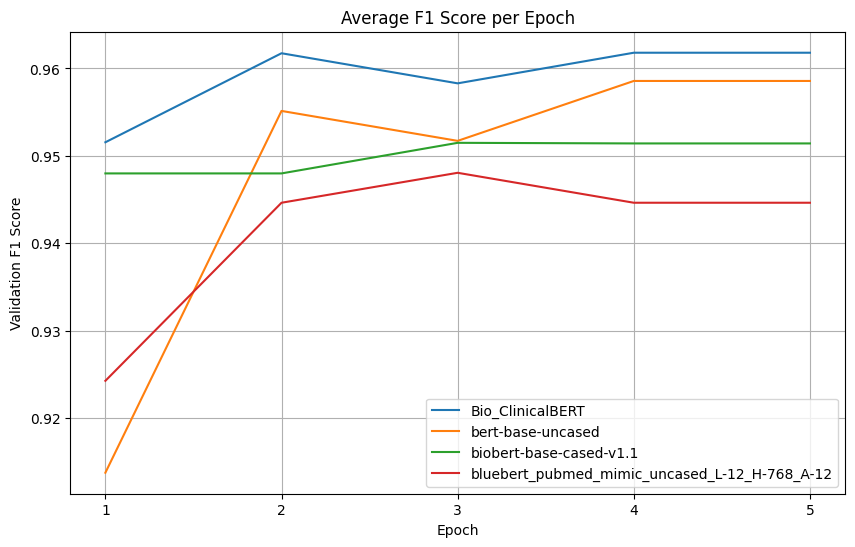

In [ ]:

plt.figure(figsize=(10, 6))
for i in range(len(filenames)):
    plt.plot(val_f1_scores[i], label=filenames[i])

plt.xlabel('Epoch')
plt.ylabel('Validation F1 Score')
plt.title('Average F1 Score per Epoch')
plt.xticks(range(len(val_accuracies[0])), range(1, len(val_accuracies[0]) + 1))
plt.legend()
plt.grid(True)
plt.show()

##**Batch Size**

In [ ]:
batch_size_list = [16,32,96]

batch_train_accuracies = []
batch_all_preds_train = []
batch_all_labels_train = []
batch_val_accuracies =[]
batch_all_preds_val = []
batch_all_labels_val = []
batch_hp = []

for batch_size in batch_size_list:
  with open(f'/content/drive/My Drive/Dissertation/reports/Models/scores/Bio_ClinicalBERT_batch{batch_size}.pkl', 'rb') as f:
      data = pickle.load(f)
  batch_train_accuracies.append(data['train_accuracies'])
  batch_all_preds_train.append(data['train_preds'])
  batch_all_labels_train.append(data['train_labels'])
  batch_val_accuracies.append(data['val_accuracies'])
  batch_all_preds_val.append(data['val_preds'])
  batch_all_labels_val.append(data['val_labels'])
  batch_hp.append(data['parameters'])


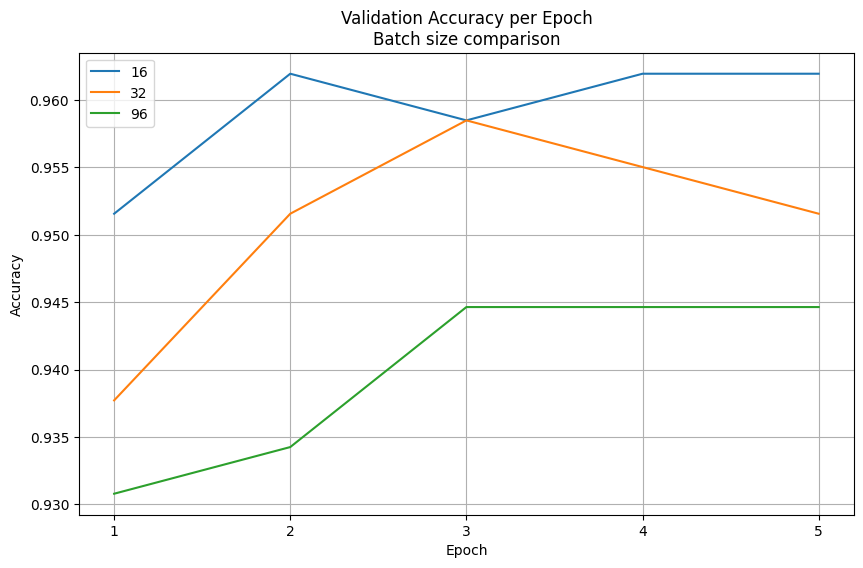

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(len(batch_size_list)):
  plt.plot(batch_val_accuracies[i], label=batch_size_list[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(len(batch_val_accuracies[0])), range(1, len(batch_val_accuracies[0]) + 1))
plt.title('Validation Accuracy per Epoch\nBatch size comparison')
plt.legend()
plt.grid(True)
plt.show()

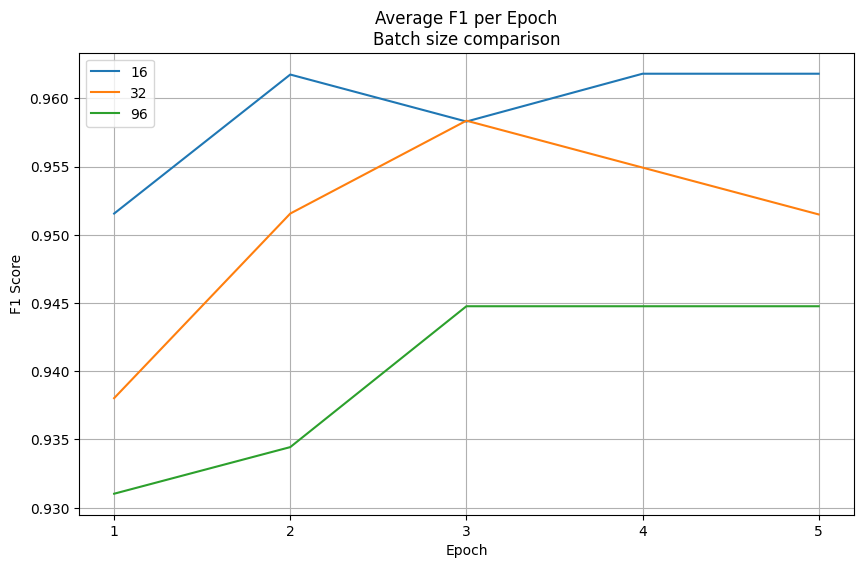

In [ ]:
#calculate f1 scores
batch_val_f1_scores = []
for i in range(len(batch_size_list)):
    f1_scores_per_model = []
    for epoch in range(len(batch_all_preds_val[i])):
        f1 = f1_score(batch_all_labels_val[i][epoch], batch_all_preds_val[i][epoch], average='weighted')
        f1_scores_per_model.append(f1)
    batch_val_f1_scores.append(f1_scores_per_model)

plt.figure(figsize=(10, 6))
for i in range(len(batch_size_list)):
    plt.plot(batch_val_f1_scores[i], label=batch_size_list[i])

plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Average F1 per Epoch\nBatch size comparison')
plt.xticks(range(len(batch_val_accuracies[0])), range(1, len(batch_val_accuracies[0]) + 1))
plt.legend()
plt.grid(True)
plt.show()

##Optimisers

In [ ]:
optimiser_list = ['AdamW','Adam','RMSprop','SGD']

optimiser_train_accuracies = []
optimiser_all_preds_train = []
optimiser_all_labels_train = []
optimiser_val_accuracies =[]
optimiser_all_preds_val = []
optimiser_all_labels_val = []
optimiser_hp = []

for optimiser in optimiser_list:
  with open(f'/content/drive/My Drive/Dissertation/reports/Models/scores/Bio_ClinicalBERT_{optimiser}.pkl', 'rb') as f:
      data = pickle.load(f)
  optimiser_train_accuracies.append(data['train_accuracies'])
  optimiser_all_preds_train.append(data['train_preds'])
  optimiser_all_labels_train.append(data['train_labels'])
  optimiser_val_accuracies.append(data['val_accuracies'])
  optimiser_all_preds_val.append(data['val_preds'])
  optimiser_all_labels_val.append(data['val_labels'])
  optimiser_hp.append(data['parameters'])

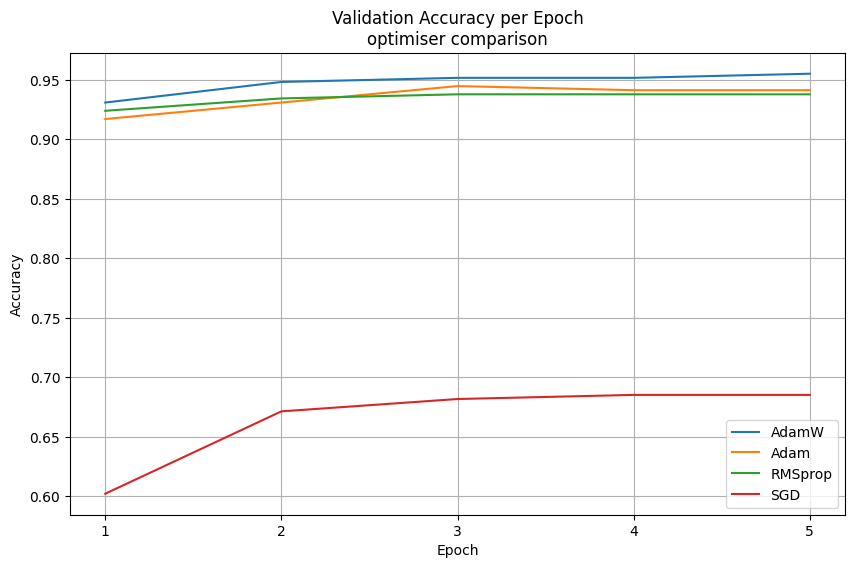

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(len(optimiser_list)):
  plt.plot(optimiser_val_accuracies[i], label=optimiser_list[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(len(optimiser_val_accuracies[0])), range(1, len(optimiser_val_accuracies[0]) + 1))
plt.title('Validation Accuracy per Epoch\noptimiser comparison')
plt.legend()
plt.grid(True)
plt.show()

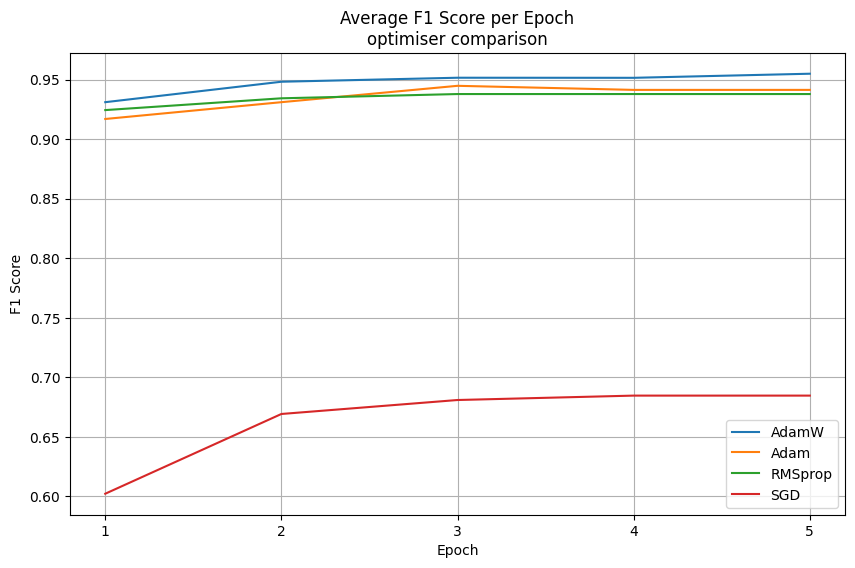

In [ ]:
#calculate f1 scores
optimiser_val_f1_scores = []

for i in range(len(optimiser_list)):
    f1_scores_per_model = []
    for epoch in range(len(optimiser_all_preds_val[i])):
        f1 = f1_score(optimiser_all_labels_val[i][epoch], optimiser_all_preds_val[i][epoch], average='weighted')
        f1_scores_per_model.append(f1)
    optimiser_val_f1_scores.append(f1_scores_per_model)

plt.figure(figsize=(10, 6))
for i in range(len(optimiser_list)):
    plt.plot(optimiser_val_f1_scores[i], label=optimiser_list[i])

plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Average F1 Score per Epoch\noptimiser comparison')
plt.xticks(range(len(optimiser_val_accuracies[0])), range(1, len(optimiser_val_accuracies[0]) + 1))
plt.legend()
plt.grid(True)
plt.show()

#**ViT model experiment results**

In [4]:
model_name_list = ["google/vit-base-patch16-224-in21k",
               "google/vit-large-patch16-224-in21k",
               "google/vit-base-patch32-224-in21k",
               "google/vit-large-patch32-224-in21k",
               "google/vit-base-patch16-384",
               "google/vit-large-patch16-384"]
filenames = []
for i in range(len(model_name_list)):
  filenames.append(model_name_list[i].split('/')[-1])
train_accuracies = []
all_preds_train = []
all_labels_train = []
val_accuracies = []
all_preds_val = []
all_labels_val = []
for name in filenames:
  with open(f'/content/drive/MyDrive/Dissertation/Images/Models/scores/{name}.pkl', 'rb') as f:
      data = pickle.load(f)
  train_accuracies.append(data['train_accuracies'])
  all_preds_train.append(data['train_preds'])
  all_labels_train.append(data['train_labels'])
  val_accuracies.append(data['val_accuracies'])
  all_preds_val.append(data['val_preds'])
  all_labels_val.append(data['val_labels'])

In [21]:
val_accuracies[0]

[0.706766917293233,
 0.6691729323308271,
 0.7293233082706767,
 0.706766917293233,
 0.7744360902255639,
 0.7443609022556391,
 0.7443609022556391,
 0.7293233082706767,
 0.6917293233082706,
 0.706766917293233]

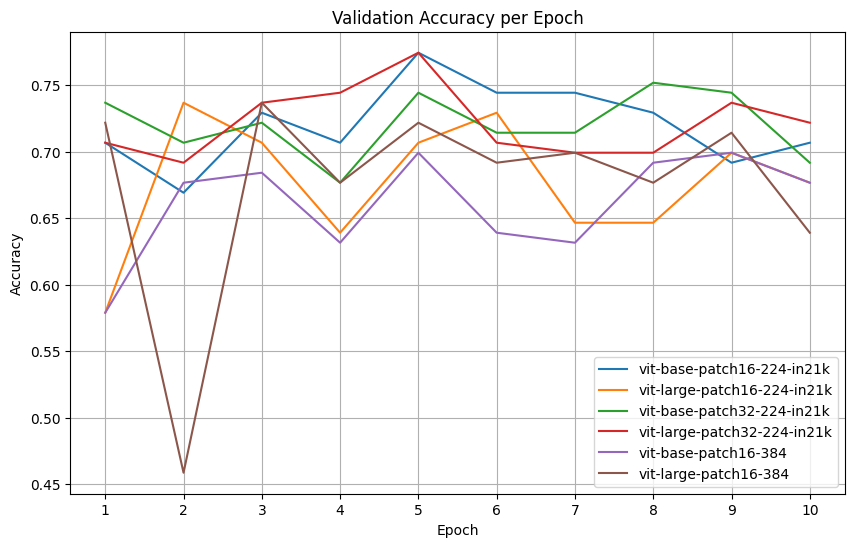

In [ ]:
import matplotlib.pyplot as plt

# Assuming val_accuracies is a list of lists, where each inner list contains the validation accuracies per epoch for a model
plt.figure(figsize=(10, 6))
for i in range(len(filenames)):
  plt.plot(val_accuracies[i], label=filenames[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(len(val_accuracies[0])), range(1, len(val_accuracies[0]) + 1))
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

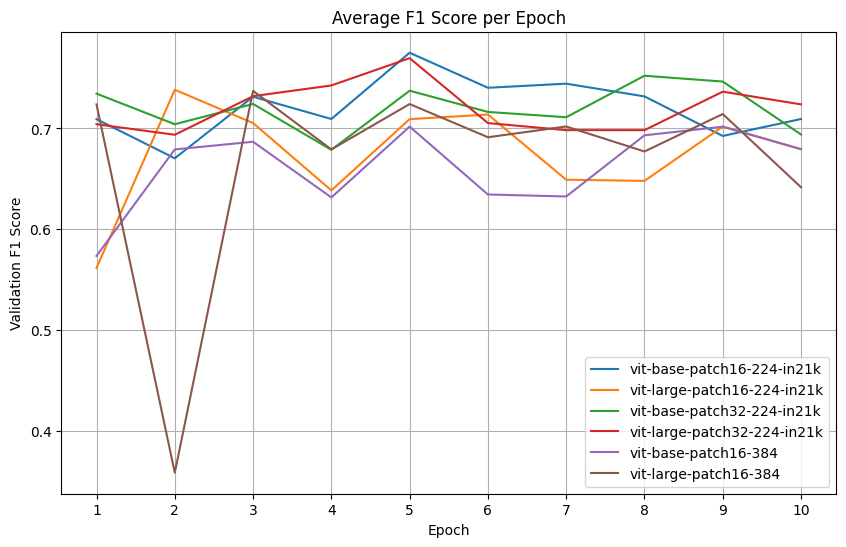

In [ ]:
#calculate f1 scores
val_f1_scores = []
for i in range(len(filenames)):
    f1_scores_per_model = []
    for epoch in range(len(all_preds_val[i])):
        f1 = f1_score(all_labels_val[i][epoch], all_preds_val[i][epoch], average='weighted')
        f1_scores_per_model.append(f1)
    val_f1_scores.append(f1_scores_per_model)
plt.figure(figsize=(10, 6))
for i in range(len(filenames)):
    plt.plot(val_f1_scores[i], label=filenames[i])

plt.xlabel('Epoch')
plt.ylabel('Validation F1 Score')
plt.title('Average F1 Score per Epoch')
plt.xticks(range(len(val_accuracies[0])), range(1, len(val_accuracies[0]) + 1))
plt.legend()
plt.grid(True)
plt.show()

In [29]:
optimiser_list = ['AdamW','Adam','RMSprop','SGD']

optimiser_train_accuracies = []
optimiser_all_preds_train = []
optimiser_all_labels_train = []
optimiser_val_accuracies =[]
optimiser_all_preds_val = []
optimiser_all_labels_val = []
optimiser_hp = []
filename='vit-base-patch32-224-in21k'
for optimiser in optimiser_list:
  with open(f'/content/drive/MyDrive/Dissertation/Images/Models/scores/{filename}_{optimiser}.pkl', 'rb') as f:
      data = pickle.load(f)
  optimiser_train_accuracies.append(data['train_accuracies'])
  optimiser_all_preds_train.append(data['train_preds'])
  optimiser_all_labels_train.append(data['train_labels'])
  optimiser_val_accuracies.append(data['val_accuracies'])
  optimiser_all_preds_val.append(data['val_preds'])
  optimiser_all_labels_val.append(data['val_labels'])

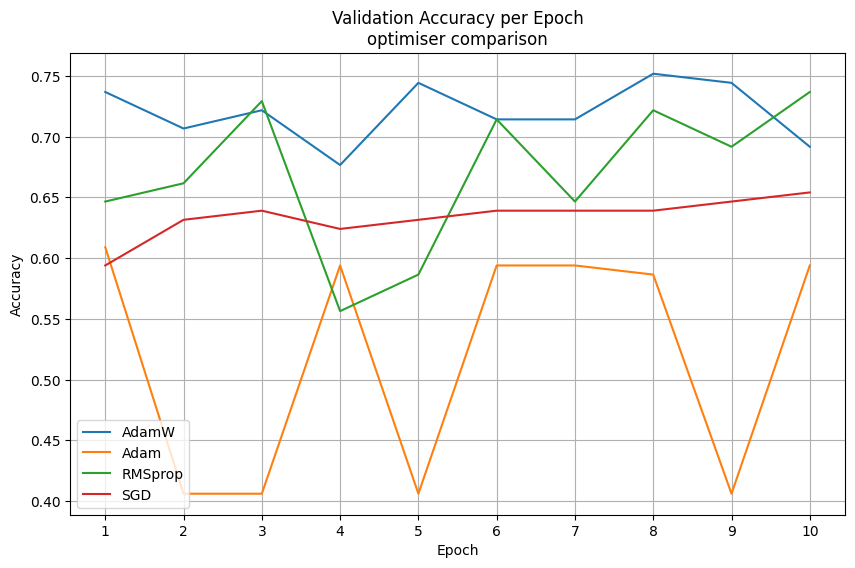

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(len(optimiser_list)):
  plt.plot(optimiser_val_accuracies[i], label=optimiser_list[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(len(optimiser_val_accuracies[0])), range(1, len(optimiser_val_accuracies[0]) + 1))
plt.title('Validation Accuracy per Epoch\noptimiser comparison')
plt.legend()
plt.grid(True)
plt.show()

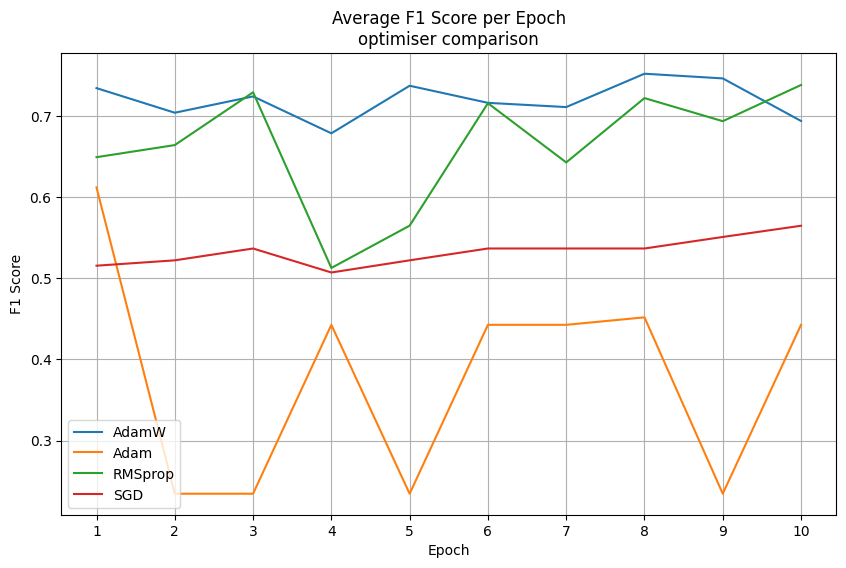

In [ ]:
#calculate f1 scores
optimiser_val_f1_scores = []

for i in range(len(optimiser_list)):
    f1_scores_per_model = []
    for epoch in range(len(optimiser_all_preds_val[i])):
        f1 = f1_score(optimiser_all_labels_val[i][epoch], optimiser_all_preds_val[i][epoch], average='weighted')
        f1_scores_per_model.append(f1)
    optimiser_val_f1_scores.append(f1_scores_per_model)

plt.figure(figsize=(10, 6))
for i in range(len(optimiser_list)):
    plt.plot(optimiser_val_f1_scores[i], label=optimiser_list[i])

plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Average F1 Score per Epoch\noptimiser comparison')
plt.xticks(range(len(optimiser_val_accuracies[0])), range(1, len(optimiser_val_accuracies[0]) + 1))
plt.legend()
plt.grid(True)
plt.show()

#Final Model Comparison

In [ ]:
#Clinical BERT model

filename = 'Bio_ClinicalBERT_batch16'
with open(f'/content/drive/MyDrive/Dissertation/reports/Models/scores/{filename}.pkl', 'rb') as f:
    data = pickle.load(f)
bert_scores = data['val_accuracies']
display(bert_scores)
#ViT model
filename = 'vit-base-patch16-224-in21k'
with open(f'/content/drive/MyDrive/Dissertation/Images/Models/scores/{filename}.pkl', 'rb') as f:
    data = pickle.load(f)
vit_scores = data['val_accuracies']
display(vit_scores[:5])


with open(f'/content/drive/MyDrive/Dissertation/Multimodal/val_accuracies.pkl', 'rb') as f:
    data = pickle.load(f)
multi_scores = data
display(multi_scores[5:])


[0.9515570934256056,
 0.9619377162629758,
 0.9584775086505191,
 0.9619377162629758,
 0.9619377162629758]

[0.706766917293233,
 0.6691729323308271,
 0.7293233082706767,
 0.706766917293233,
 0.7744360902255639]

[0.9624074619470052,
 0.9624074619470052,
 0.9698911043964707,
 0.9624074619470052,
 0.9624074619470052]

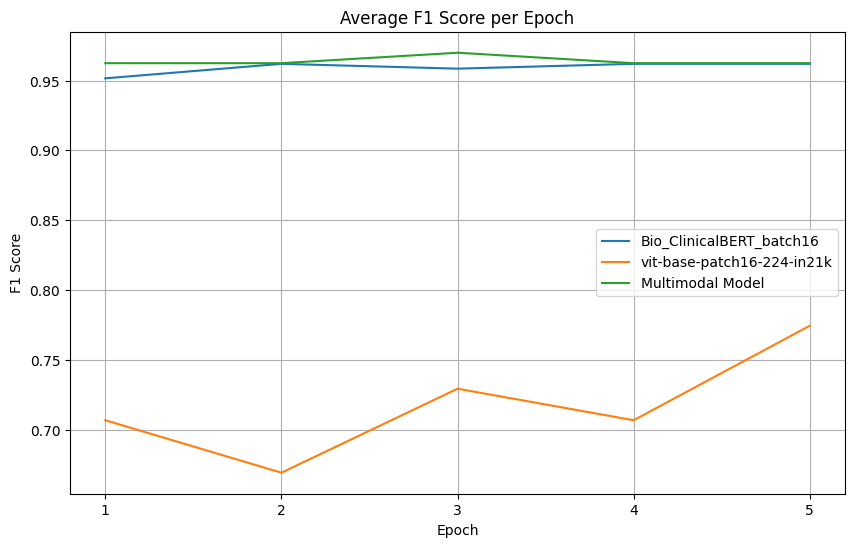

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(bert_scores) + 1), bert_scores, label='Bio_ClinicalBERT_batch16')
plt.plot(range(1, len(vit_scores[:5]) + 1), vit_scores[:5], label='vit-base-patch16-224-in21k')
plt.plot(range(1,len(multi_scores[5:])+1), multi_scores[5:], label='Multimodal Model')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Average F1 Score per Epoch')
plt.xticks([1,2,3,4,5])
plt.legend()
plt.grid(True)
plt.show()

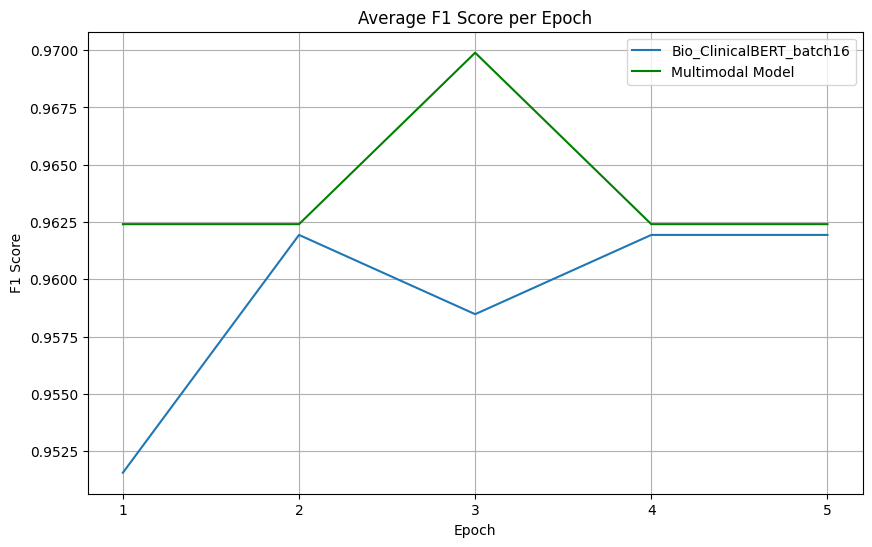

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(bert_scores) + 1), bert_scores, label='Bio_ClinicalBERT_batch16')
plt.plot(range(1,len(multi_scores[5:])+1), multi_scores[5:], label='Multimodal Model',color='green')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Average F1 Score per Epoch')
plt.xticks([1,2,3,4,5])
plt.legend()
plt.grid(True)
plt.show()